<a href="https://colab.research.google.com/github/JayabharathiRavi/Computer_vision/blob/main/Akaike_computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COMPUTER VISION ASSIGNMENT**

The given jpg file contains the images which have mixed rice grains of full rice grain and broken rice grain.

**Technology Used**

Computer Vision, OpenCv, WaterShed Algorithm, Image Preprocessing, Image Segmentation, and others.

## **FIND THE OBJECTIVES**

Objective 1: Count the number of rice grains in the Image. 

Objective 2: Find the number of broken grains in the image

## **DATASET**

Get the image file here: http://shorturl.at/zHJ07 

### **DATA SAMPLE:**

The background will always be blue. 

There will be a mix of broken and non-broken rice grains.

The grains will not overlap but can touch each other. 

### **STEPS INVOLVED TO SOLVE THE PROBLEM:**

STEP 1: IMPORTING THE FOLLOWING LIBRARIES
      Open cv,skimage,matplotlib,numpy,scipy and warning

STEP 2: DEFINING REQUIRED FUNCTION
      Defining custom "show" function for Image Visualization

STEP 3: IMAGE PRE-PROCESSING
      GrayScale Conversion

STEP 4: IMAGE THERSHOLDING
      Morphological Transformations (Noise Removal)

STEP 5: COUNTING RICE GRAINS USING THE CONTOURS METHOD
      Working over Clear image to get insight into grain touching problem

STEP 6: APPLYING WATERSHED ALGORITHM (Solving grains touching problem)
      Applying Watershed Algorithm for Solving Touching rice grains problem

STEP 7: COUNTING TOTAL RICE GRAINS AND BROKEN RICE GRAINS USING THE CONTOUR AREA
      For total rice grains counting: the Watershed method
      For broken rice grains counting: A filter of an average area of broken rice grain.


EXPLANATION:

The main Idea behind solving the objectives(Counting rice grains) is to make the provided image in the best possible format.

If there would be clarity in the image, and rice grains are well separated from the background image then there would be ease in counting them.

Then, Solving the Corner cases and hence building the solution.

### There are 3 major and challenging parts in building solutions:

    Image Preprocessing
    Solving Grains touching problem
    Counting broken rice

## Image Preprocessing

Image preprocessing is one of the vital parts of the solution.

If the image is perfectly tuned as per the needs then it becomes easy to work further with the approaches.

As part of Solution, I have used:

  Conversion of BGR Image to Grayscale Image

  Image Thresholding
  
  And removing noise from the thresholded image using morphologyEx (Opening)
  
  After all the processes, the clear Image was ready for further use.

## Solving Grains touching Problem

After successfully Pre-processing the image, there comes the challenging part of the problem statement.

"Counting the rice grains that are touching each other"

It is not even easy for a human eye in the manual inspection process to count the rice grains. The small size and white colour creates illusion.

Well for Machines,
Counting Rice grains are quite easy if they are well separated. The reason is there are lots of algorithms out there and various techniques that can come in help.

But when there is an object touching or overlapping problem then there needs a lot of effort in grain classification.

In our case, it becomes more difficult as the rice grains are quite small size.

Because of its small in size, We can't apply processes like erosion to get the touching corner part separated.

So, For Solving this problem, I have applied the WaterShed Algorithm:

WaterShed Algorithm is based on extracting sure background and foreground and then using markers will make the watershed algorithm run and detect the exact boundaries.

It is like, filling the valleys and then separating hills out of that.

## Counting broken rice

After using the Watershed algorithm, We will get the total number of rice present in the image, but counting broken rice grains is one of the typical tasks.

I used an area-based approach, where I put a threshold after several trails and errors that helps in classifying the rice grains into two categories.

**Either Broken rice grain or Full rice grain**.

If the area of the Image is below the provided threshold then it is counted in the broken rice category.

Thus with this, we are done with the solutions of both of the objectives .



# **IMPLEMENTATION**


### **IMPORTING THE NECESSARY PACKAGES**

Importing all the necessary packages for the futhure use in solving the problem.

In [ ]:
#Importing openCv both as cv2 and cv for better convinence 
import cv2  
import cv2 as cv 

# Importing numpy for working with numpy arrays
import numpy as np 

# Importing pyplot as plt from maplotlib for Image Visualization
from matplotlib import pyplot as plt 

#Collab not support cv2.imshow method thus, importing cv2.imshow method for better Image visualization 
from google.colab.patches import cv2_imshow  

#Importing PIL library for working with Images
from PIL import Image 

#Importing asarray method from numpy for dealing with pixels of Images
from numpy import asarray 

import matplotlib.image as mpimg

#Importing ndimage from scipy as this package contains various functions for multidimensional image processing.
from scipy import ndimage

#Importing filters, features, measures and color from skimage
from skimage import filters, feature, measure, color

#Importing Watershed for touching Grains sepration
from skimage.segmentation import watershed

#It ignores the warnings
import warnings
warnings.filterwarnings('ignore')

### Defining show function for displaying  image with custom X and Y cordinates


In [ ]:
def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

## **IMAGE 1:**
Reading the image 1

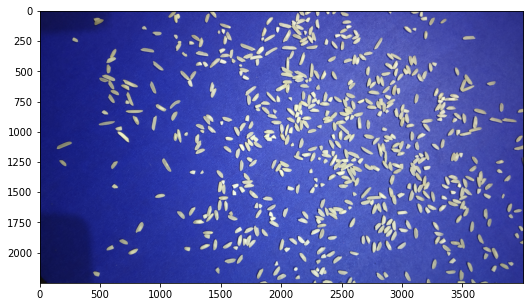

In [ ]:
#Reading Image
img = cv2.imread("/content/image_1.jpg")

#Using predefined show function for displaying the image
show(img,25,5)

### **IMAGE PREPROCESSING**

Image processing is most important to part of computer vision.
The aim of the image preprocessing is to improve the quality of the image to solve the problem statement in a better way.

**Converting Image into Grayscale and then Image Thresholding**

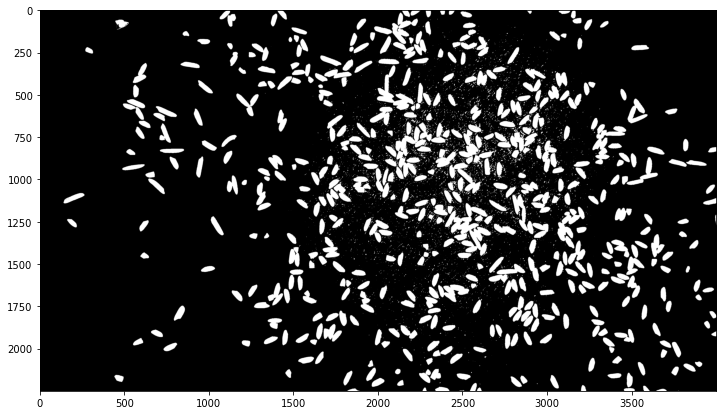

In [ ]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)

**Noise Removal**

To remove some noise from an image, the morphological function morphologyEx() can be Implemented.

This function can be used for several morphological operations, so there needed to add a parameter to specify which one can be taken.

Since the goal here is to remove the white ditorted reason the objectin the image. Here, opening operation (erosion followed by dilation) is going to be in use.

In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)



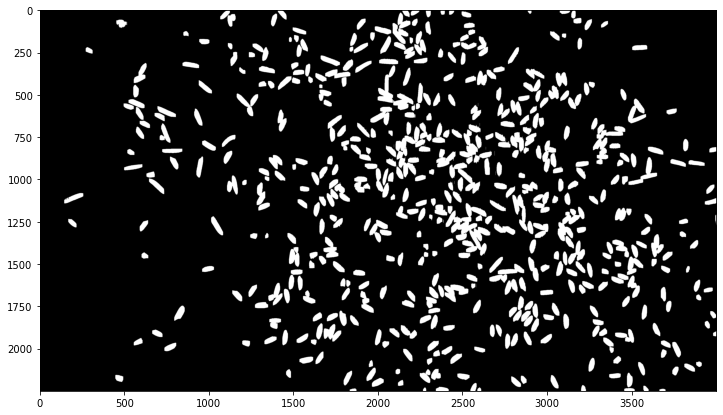

In [ ]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

Image pre-processing is done now, and its time to apply the Grain counting algorithm.



### **Counting rice grains using Contours method**

Applying Opencv Contour method for counting the total number of rice grains avilable in the image.

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

In [ ]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 513


Number of detected contours 513


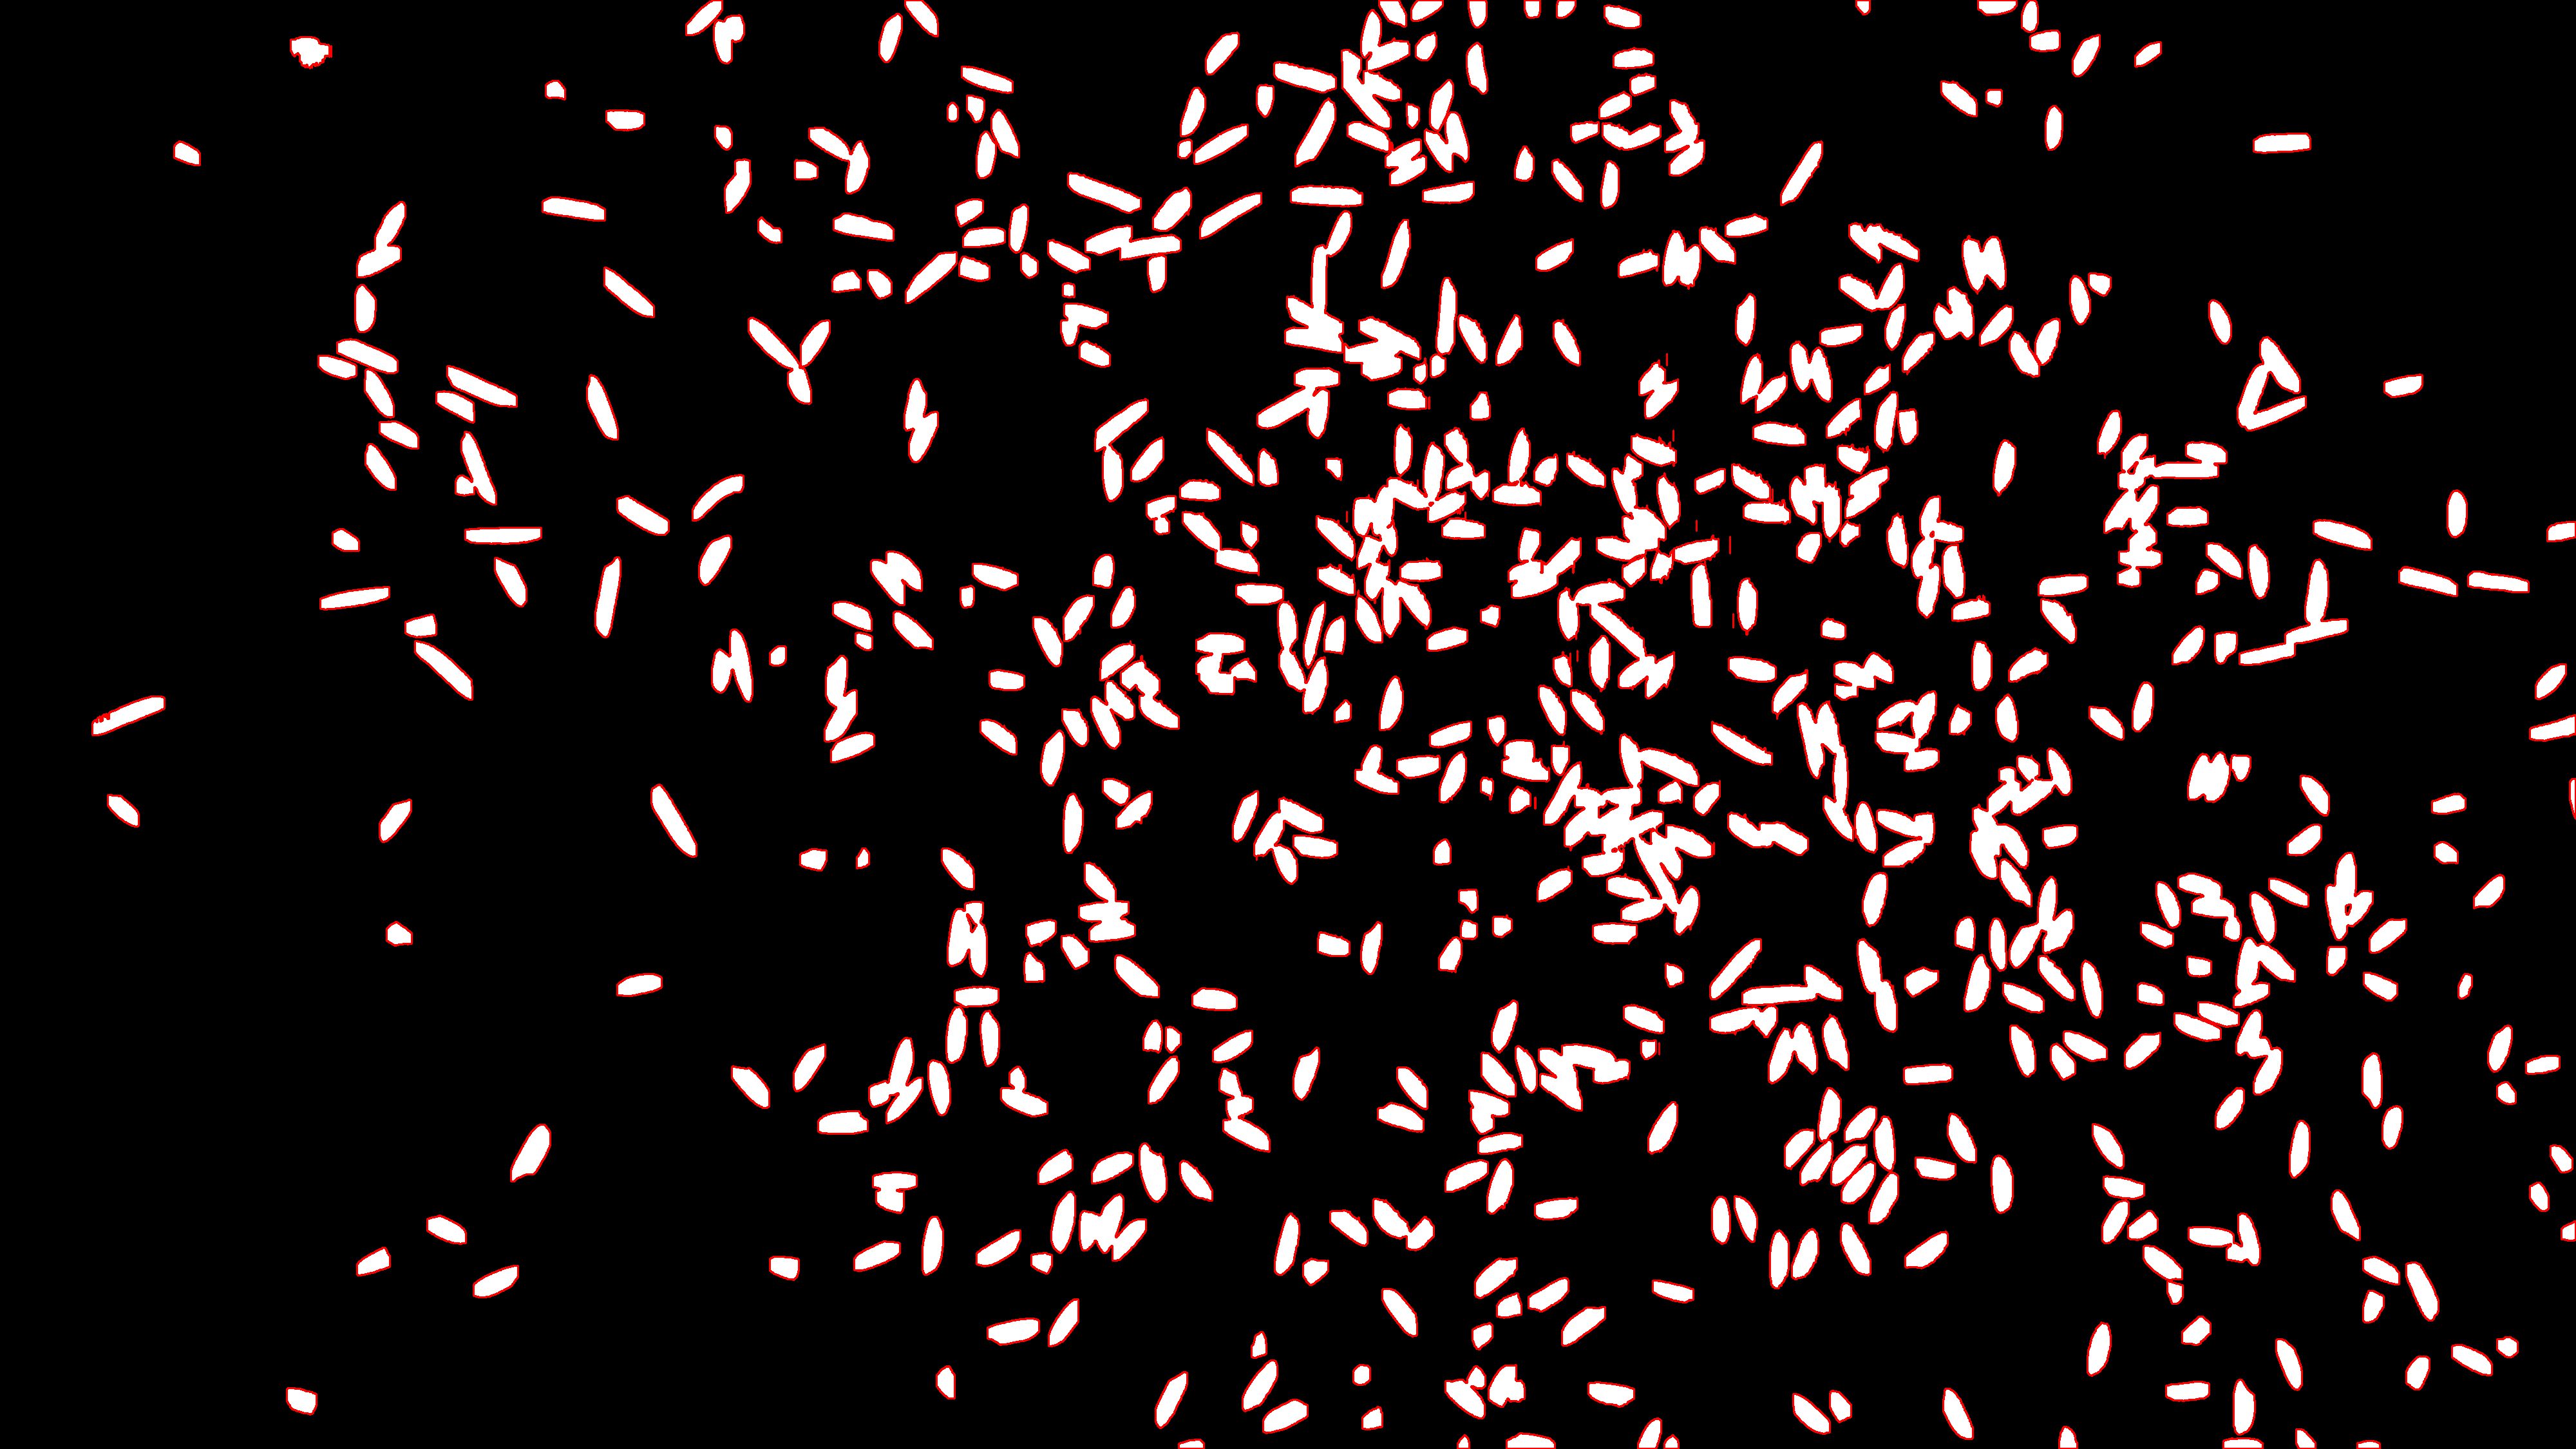

In [ ]:
print("Number of detected contours", len(contours))
cv2_imshow(output_contour)

Number of detected contours are 513, It denotes, total number of rice grain in the Image.

### **Applying Watershed Algorithm**
Fixing rice grains Touching problem with "WaterShed Algorithm"
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. 

This algorithm generally helps in detecting touching and overlapping objects in image.

In [ ]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.

#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

**Counting Total Grains and Broken grains using grains area**

Number of Rice grains are : 586


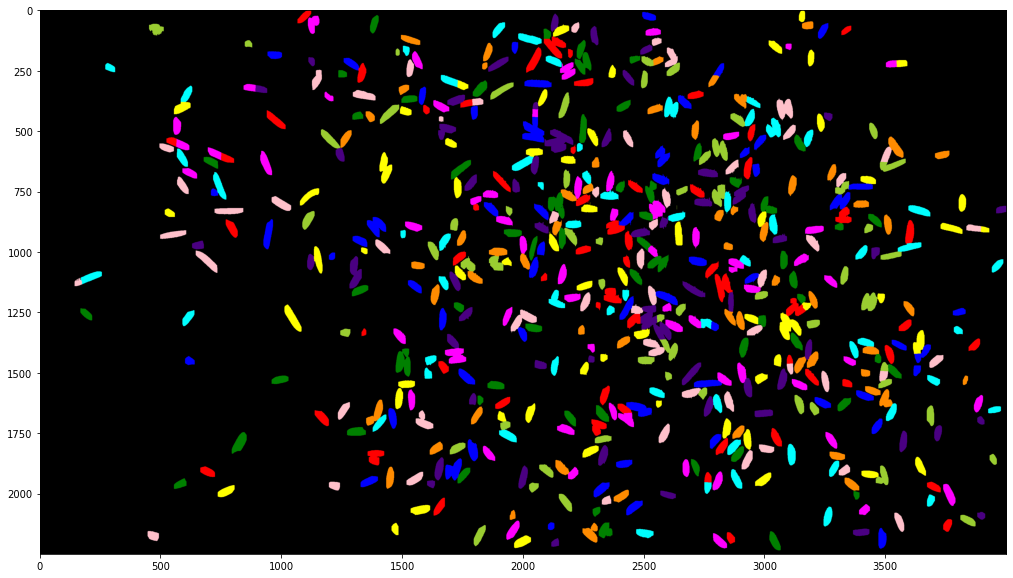

In [ ]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

### **Results of WaterShed Algorithm**
The results are quite better after applying the Watershed algorithm. Most of the touching rice grains are well seperated now and counting is more accurate.

In the above results, there is the total counting of 513 and here, the count is of 586.

It means, there is total gap of 73 grains.

Well, the results are not 100% accurate but it is feasible in respect of Simple countous counting.

**Counting Broken Rice**

In [ ]:
#Creating A list name count for counting the total Broken rice grains
count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  87


## **image1.jpg :**

Objective 1 : 

Count the Total number of Rice grains = 586

Object 2 :

Count the broken number of Rice grains = 87

## **IMAGE 2**
Read the image 2

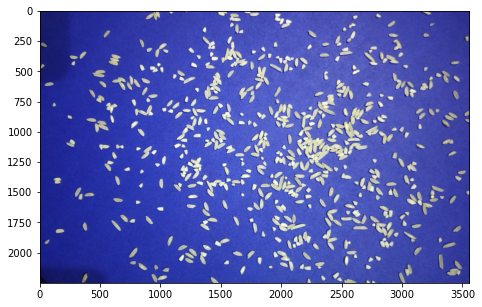

In [ ]:
#Reading Image
img = cv2.imread("/content/image_2.jpg")

#Using predefined show function for displaying the image
show(img,25,5)

**Converting Image into Grayscale and then Image Thresholding**

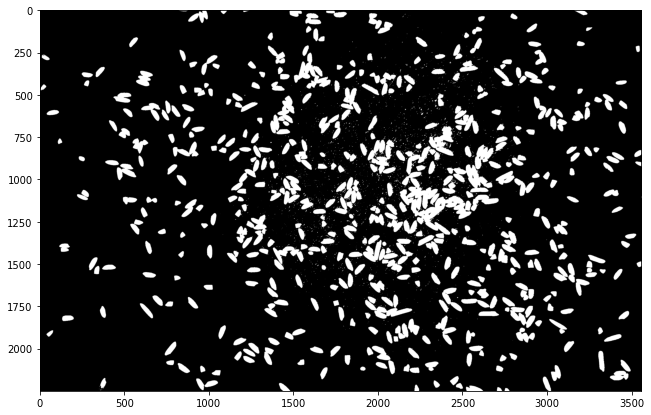

In [ ]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)

**Noise Removal**

To remove some noise from an image, the morphological function morphologyEx() can be Implemented.

This function can be used for several morphological operations, so there needed to add a parameter to specify which one can be taken.

Since the goal here is to remove the white ditorted reason the objectin the image. Here, opening operation (erosion followed by dilation) is going to be in use.

In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)



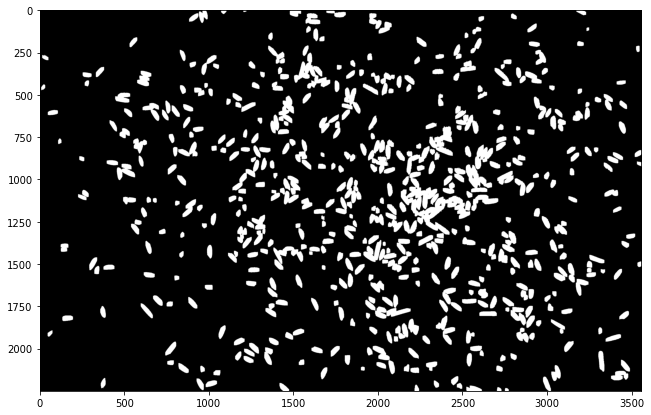

In [ ]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

Image pre-processing is done now, and its time to apply the Grain counting algorithm.



### **Counting rice grains using Contours method**

Applying Opencv Contour method for counting the total number of rice grains avilable in the image.

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

In [ ]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 517


Number of detected contours 517


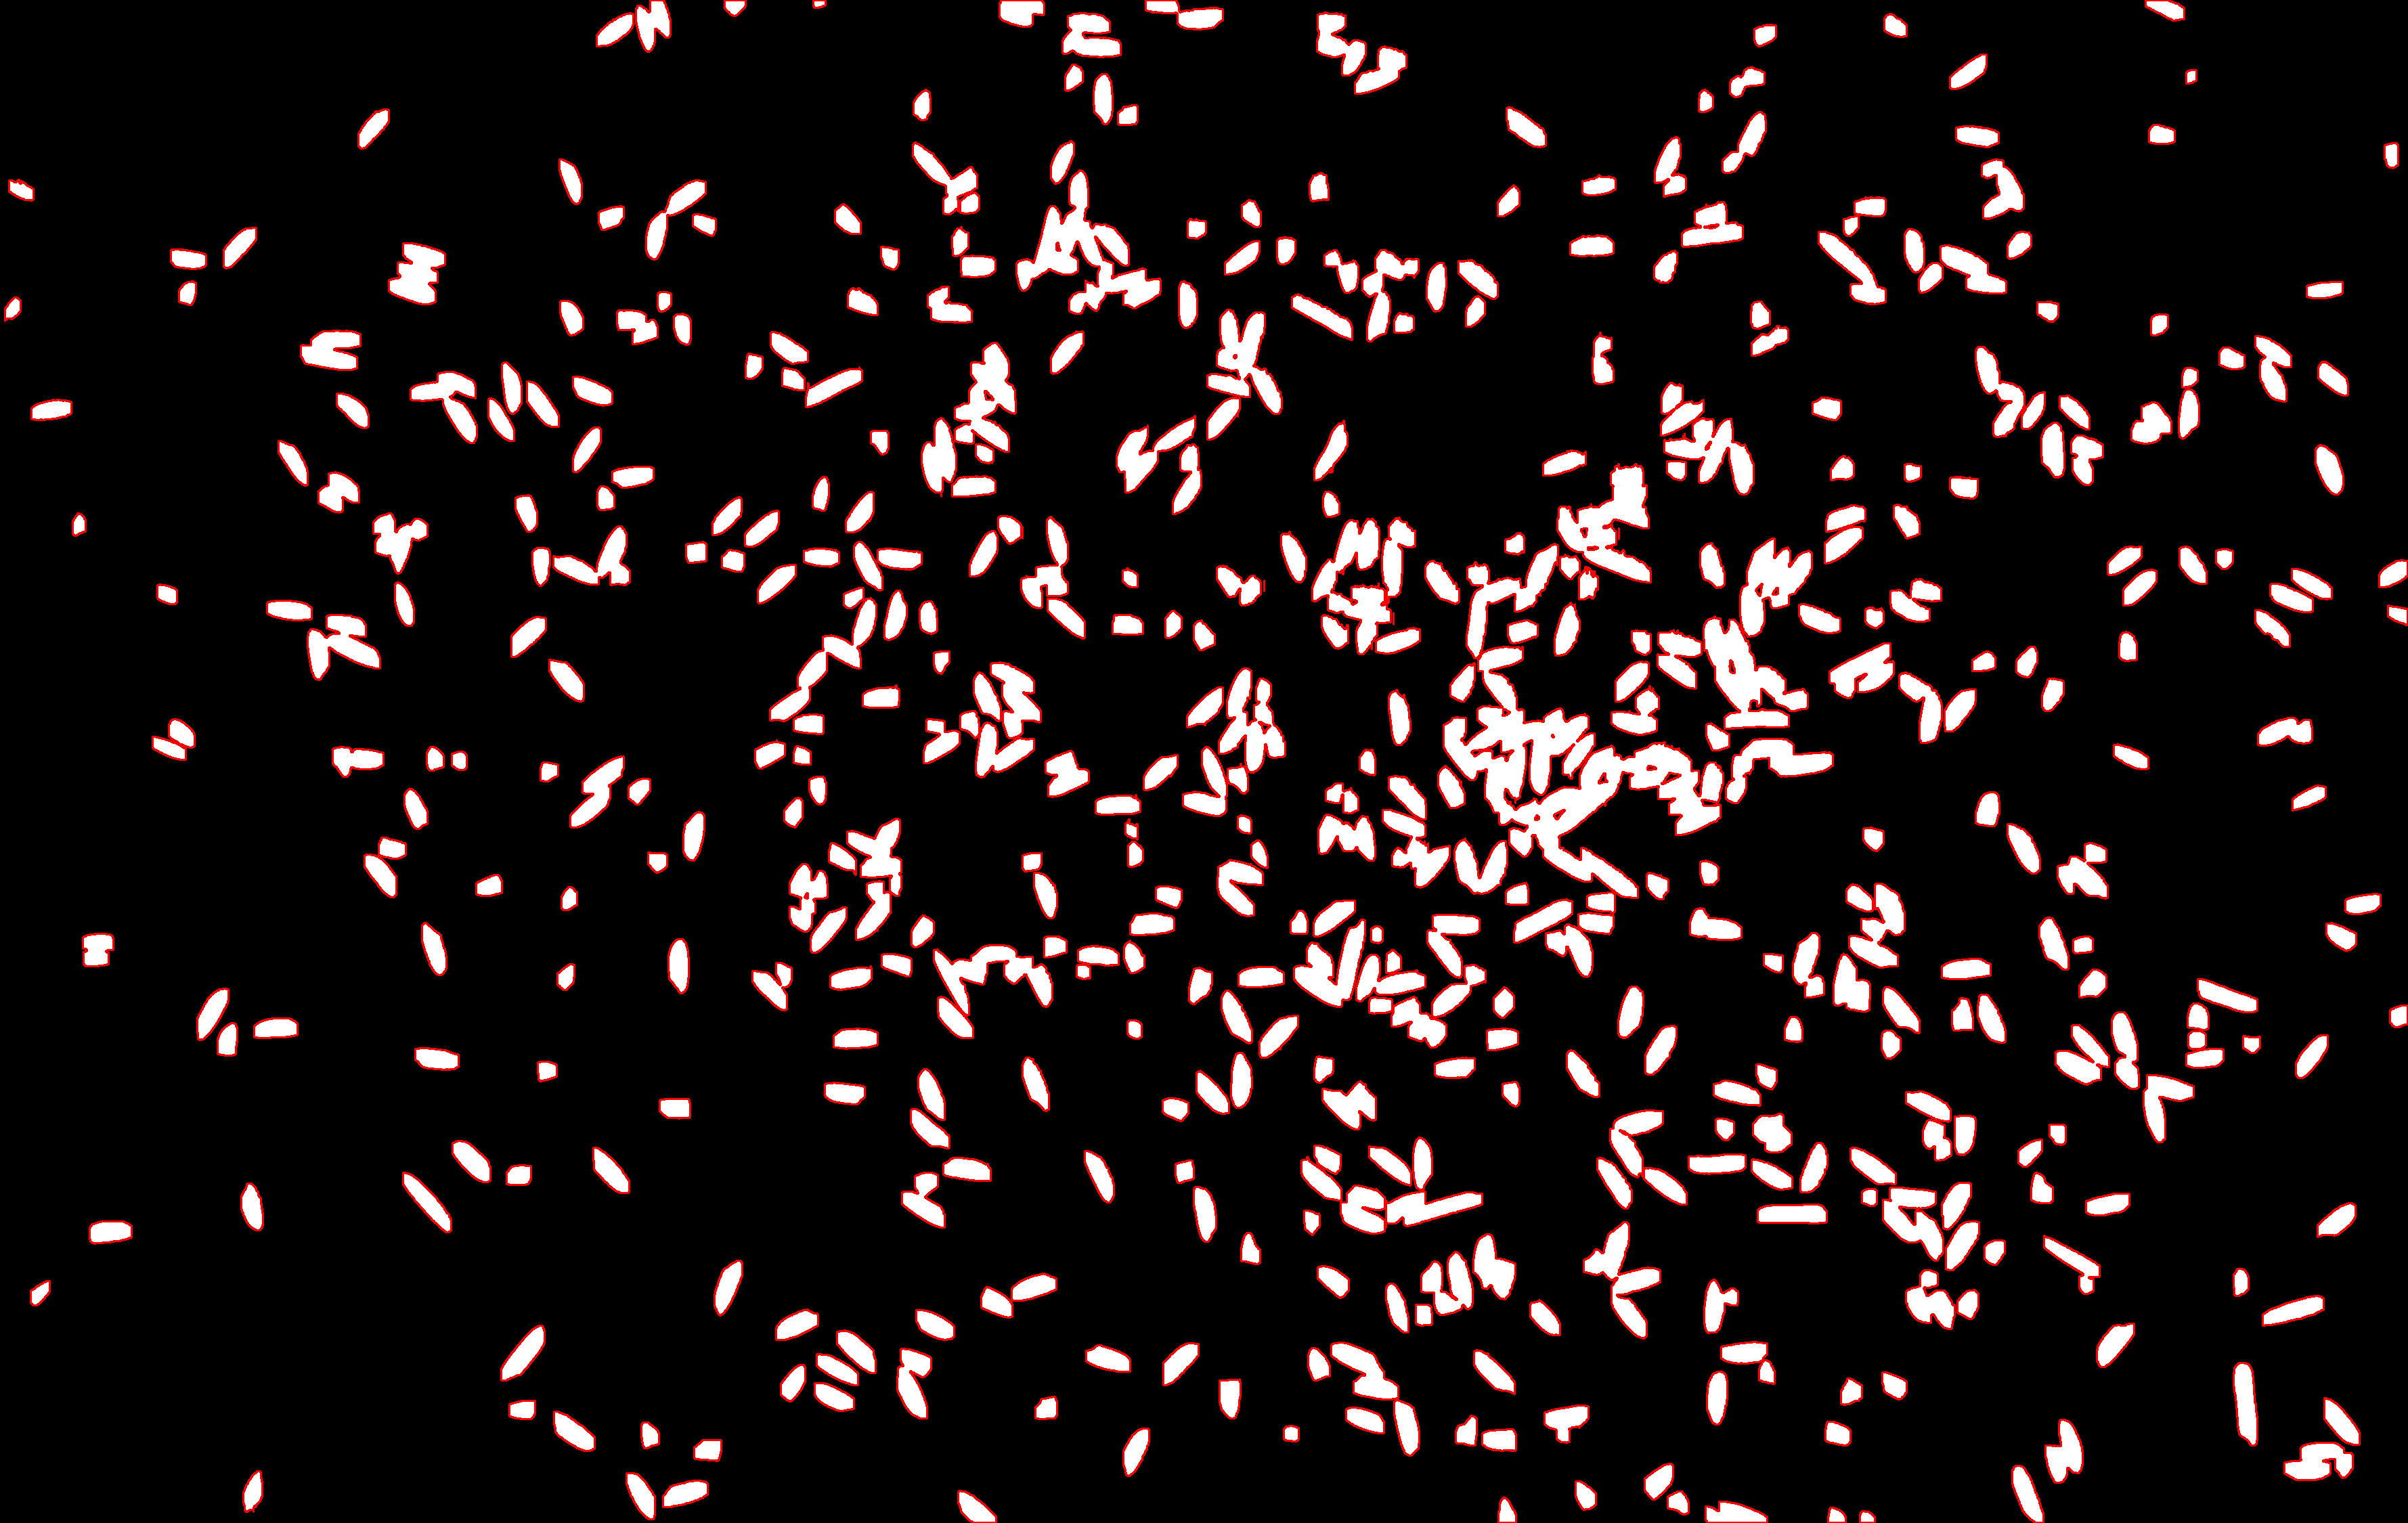

In [ ]:
print("Number of detected contours", len(contours))
cv2_imshow(output_contour)

Number of detected contours are 517, It denotes, total number of rice grain in the Image.

### **Applying Watershed Algorithm**
Fixing rice grains Touching problem with "WaterShed Algorithm"
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. 

This algorithm generally helps in detecting touching and overlapping objects in image.

In [ ]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.

#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

**Counting Total Grains and Broken grains using grains area**

Number of Rice grains are : 602


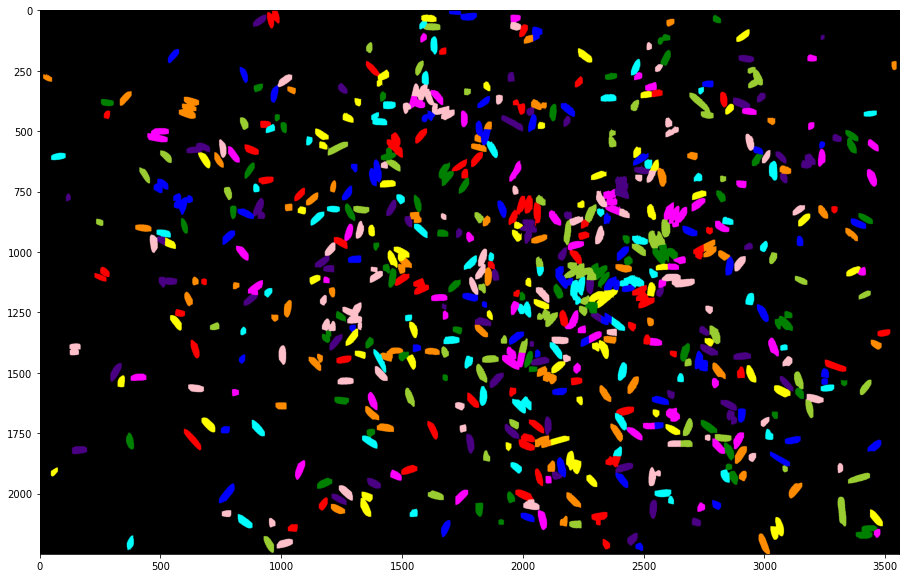

In [ ]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

### **Results of WaterShed Algorithm**
The results are quite better after applying the Watershed algorithm. Most of the touching rice grains are well seperated now and counting is more accurate.

In the above results, there is the total counting of 517 and here, the count is of 602.

It means, there is total gap of 85 grains.

Well, the results are not 100% accurate but it is feasible in respect of Simple countous counting.

**Counting Broken Rice**

In [ ]:
#Creating A list name count for counting the total Broken rice grains
count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  135


## **image2.jpg :**

Objective 1 : 

Count the Total number of Rice grains = 602

Object 2 :

Count the broken number of Rice grains = 135

## **IMAGE 3**
Read the image 3

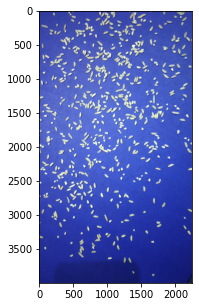

In [ ]:
#Reading Image
img = cv2.imread("/content/image_3.jpg")

#Using predefined show function for displaying the image
show(img,25,5)

**Converting Image into Grayscale and then Image Thresholding**

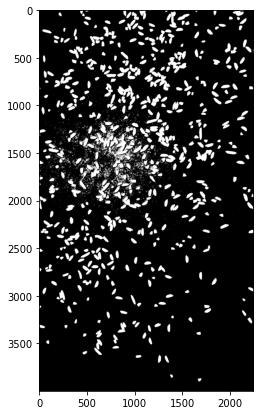

In [ ]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)

**Noise Removal**

To remove some noise from an image, the morphological function morphologyEx() can be Implemented.

This function can be used for several morphological operations, so there needed to add a parameter to specify which one can be taken.

Since the goal here is to remove the white ditorted reason the objectin the image. Here, opening operation (erosion followed by dilation) is going to be in use.

In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)



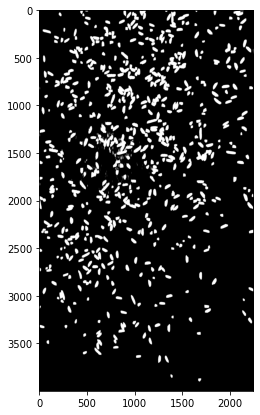

In [ ]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

Image pre-processing is done now, and its time to apply the Grain counting algorithm.



### **Counting rice grains using Contours method**

Applying Opencv Contour method for counting the total number of rice grains avilable in the image.

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

In [ ]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 661


Number of detected contours 661


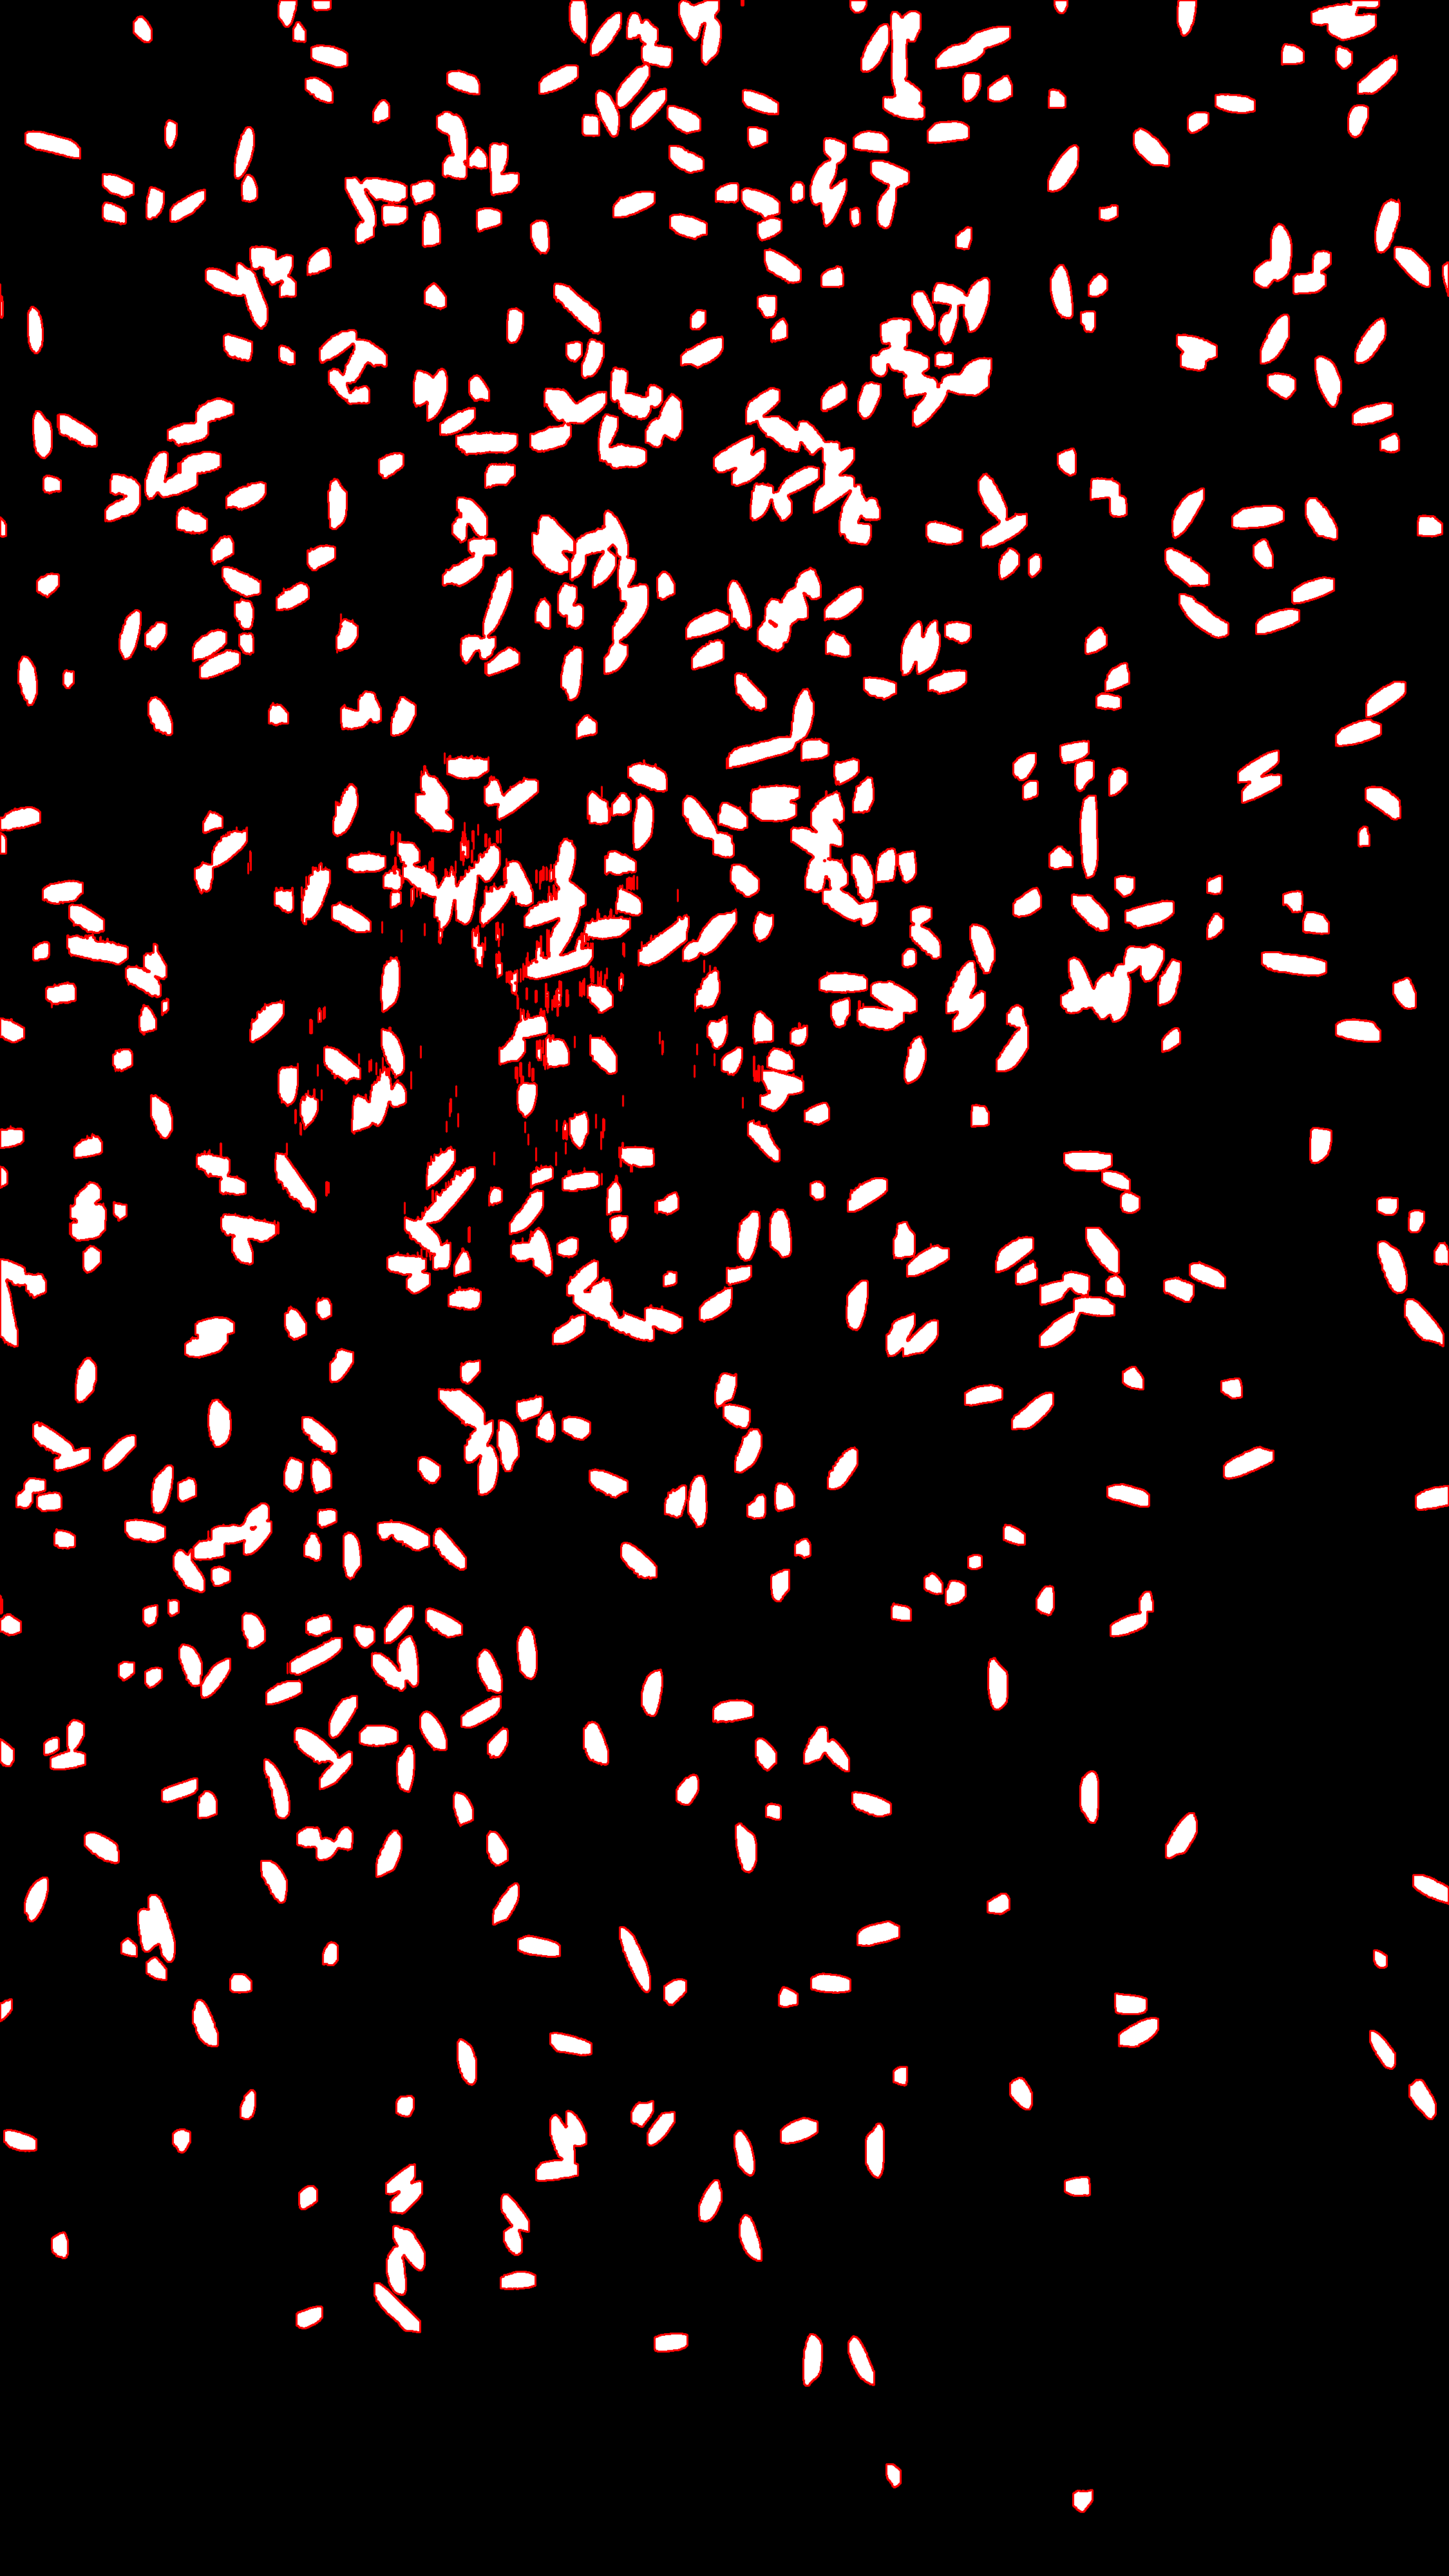

In [ ]:
print("Number of detected contours", len(contours))
cv2_imshow(output_contour)

Number of detected contours are 661, It denotes, total number of rice grain in the Image.

### **Applying Watershed Algorithm**
Fixing rice grains Touching problem with "WaterShed Algorithm"
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. 

This algorithm generally helps in detecting touching and overlapping objects in image.

In [ ]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.

#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

**Counting Total Grains and Broken grains using grains area**

Number of Rice grains are : 618


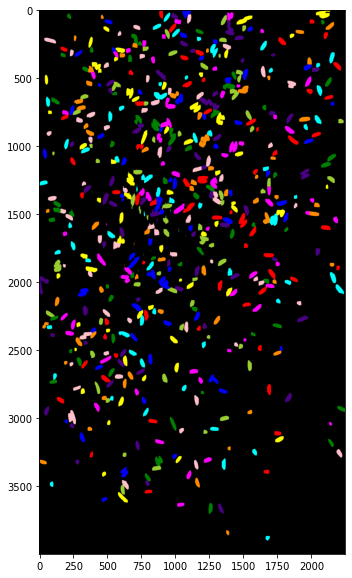

In [ ]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

### **Results of WaterShed Algorithm**
The results are quite better after applying the Watershed algorithm. Most of the touching rice grains are well seperated now and counting is more accurate.

In the above results, there is the total counting of 661 and here, the count is of 618.

It means, there is total gap of 43 grains.

Well, the results are not 100% accurate but it is feasible in respect of Simple countous counting.

**Counting Broken Rice**

In [ ]:
#Creating A list name count for counting the total Broken rice grains
count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  246


## **image3.jpg :**

Objective 1 : 

Count the Total number of Rice grains = 618

Object 2 :

Count the broken number of Rice grains = 246

## **IMAGE 4**
Read the image 4

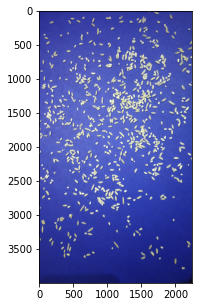

In [ ]:
#Reading Image
img = cv2.imread("/content/image_4.jpg")

#Using predefined show function for displaying the image
show(img,25,5)

**Converting Image into Grayscale and then Image Thresholding**

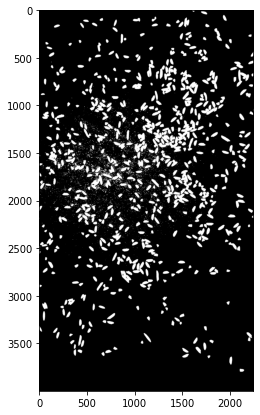

In [ ]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)

**Noise Removal**

To remove some noise from an image, the morphological function morphologyEx() can be Implemented.

This function can be used for several morphological operations, so there needed to add a parameter to specify which one can be taken.

Since the goal here is to remove the white ditorted reason the objectin the image. Here, opening operation (erosion followed by dilation) is going to be in use.

In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)



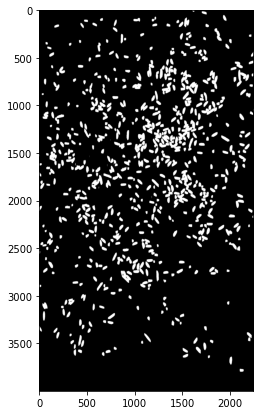

In [ ]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

Image pre-processing is done now, and its time to apply the Grain counting algorithm.



### **Counting rice grains using Contours method**

Applying Opencv Contour method for counting the total number of rice grains avilable in the image.

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

In [ ]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 629


Number of detected contours 629


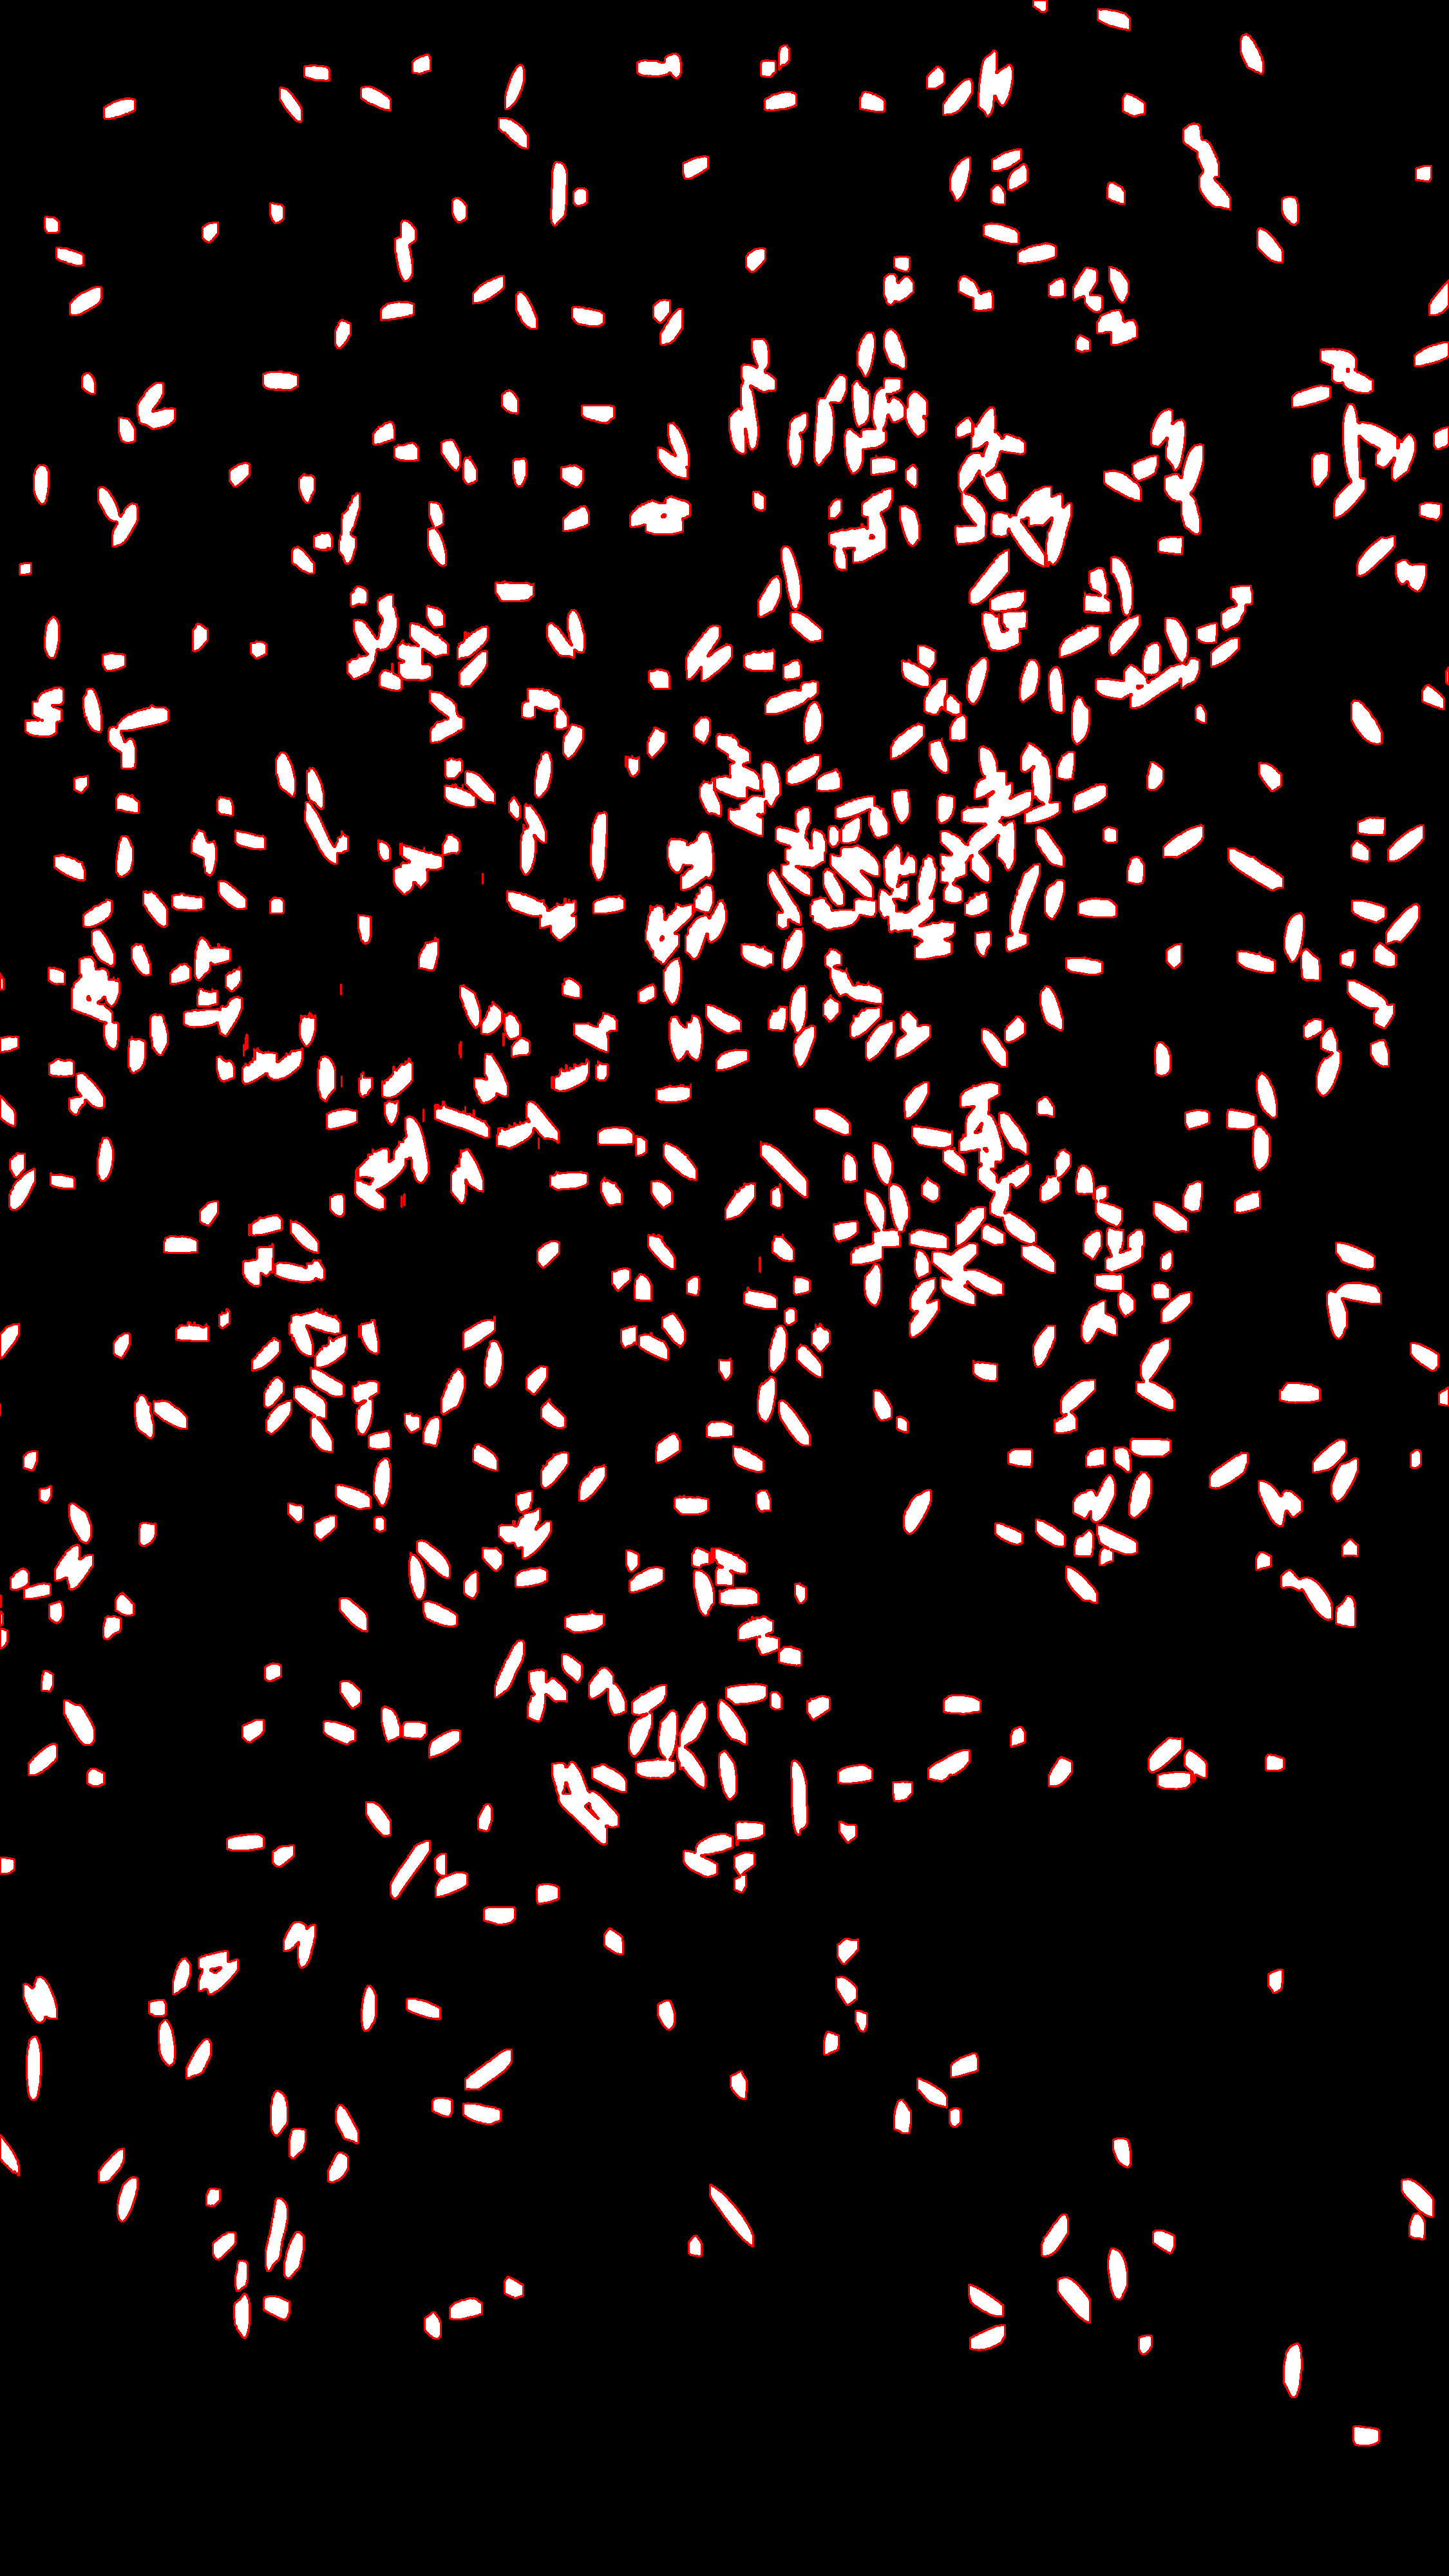

In [ ]:
print("Number of detected contours", len(contours))
cv2_imshow(output_contour)

Number of detected contours are 629, It denotes, total number of rice grain in the Image.

### **Applying Watershed Algorithm**
Fixing rice grains Touching problem with "WaterShed Algorithm"
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. 

This algorithm generally helps in detecting touching and overlapping objects in image.

In [ ]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.

#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

**Counting Total Grains and Broken grains using grains area**

Number of Rice grains are : 695


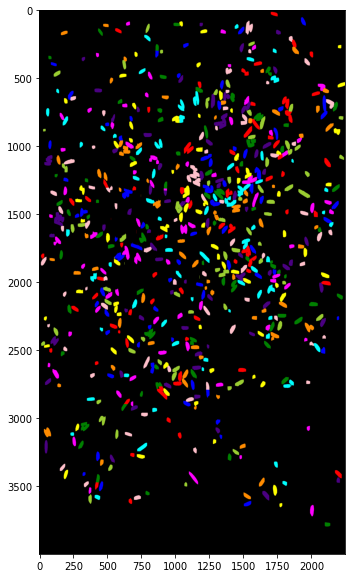

In [ ]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

### **Results of WaterShed Algorithm**
The results are quite better after applying the Watershed algorithm. Most of the touching rice grains are well seperated now and counting is more accurate.

In the above results, there is the total counting of 629 and here, the count is of 695.

It means, there is total gap of 66 grains.

Well, the results are not 100% accurate but it is feasible in respect of Simple countous counting.

**Counting Broken Rice**

In [ ]:
#Creating A list name count for counting the total Broken rice grains
count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  187


## **image4.jpg :**

Objective 1 : 

Count the Total number of Rice grains = 695

Object 2 :

Count the broken number of Rice grains = 187

## **IMAGE 5**
Read the image 5

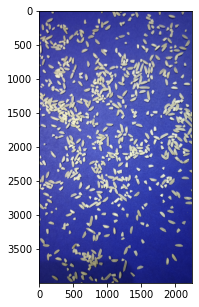

In [ ]:
#Reading Image
img = cv2.imread("/content/image_5.jpg")

#Using predefined show function for displaying the image
show(img,25,5)

**Converting Image into Grayscale and then Image Thresholding**

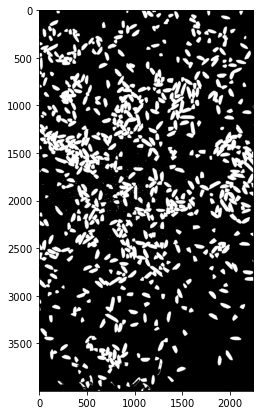

In [ ]:
#Converting Image BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(grayscale_Image, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img)

**Noise Removal**

To remove some noise from an image, the morphological function morphologyEx() can be Implemented.

This function can be used for several morphological operations, so there needed to add a parameter to specify which one can be taken.

Since the goal here is to remove the white ditorted reason the objectin the image. Here, opening operation (erosion followed by dilation) is going to be in use.

In this case, we will use four iterations iterations=8 (to suppress larger noise areas we will use more iterations)



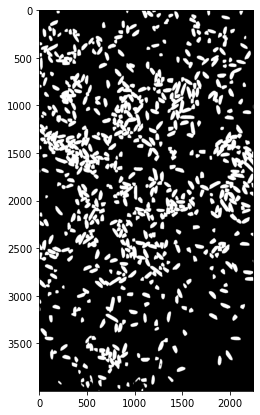

In [ ]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image)

Image pre-processing is done now, and its time to apply the Grain counting algorithm.



### **Counting rice grains using Contours method**

Applying Opencv Contour method for counting the total number of rice grains avilable in the image.

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity.

In [ ]:
#Applying Countours method to get the count of rice grains
contours, hierarchy = cv.findContours(clear_image, 
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

Number of detected contours 504


Number of detected contours 504


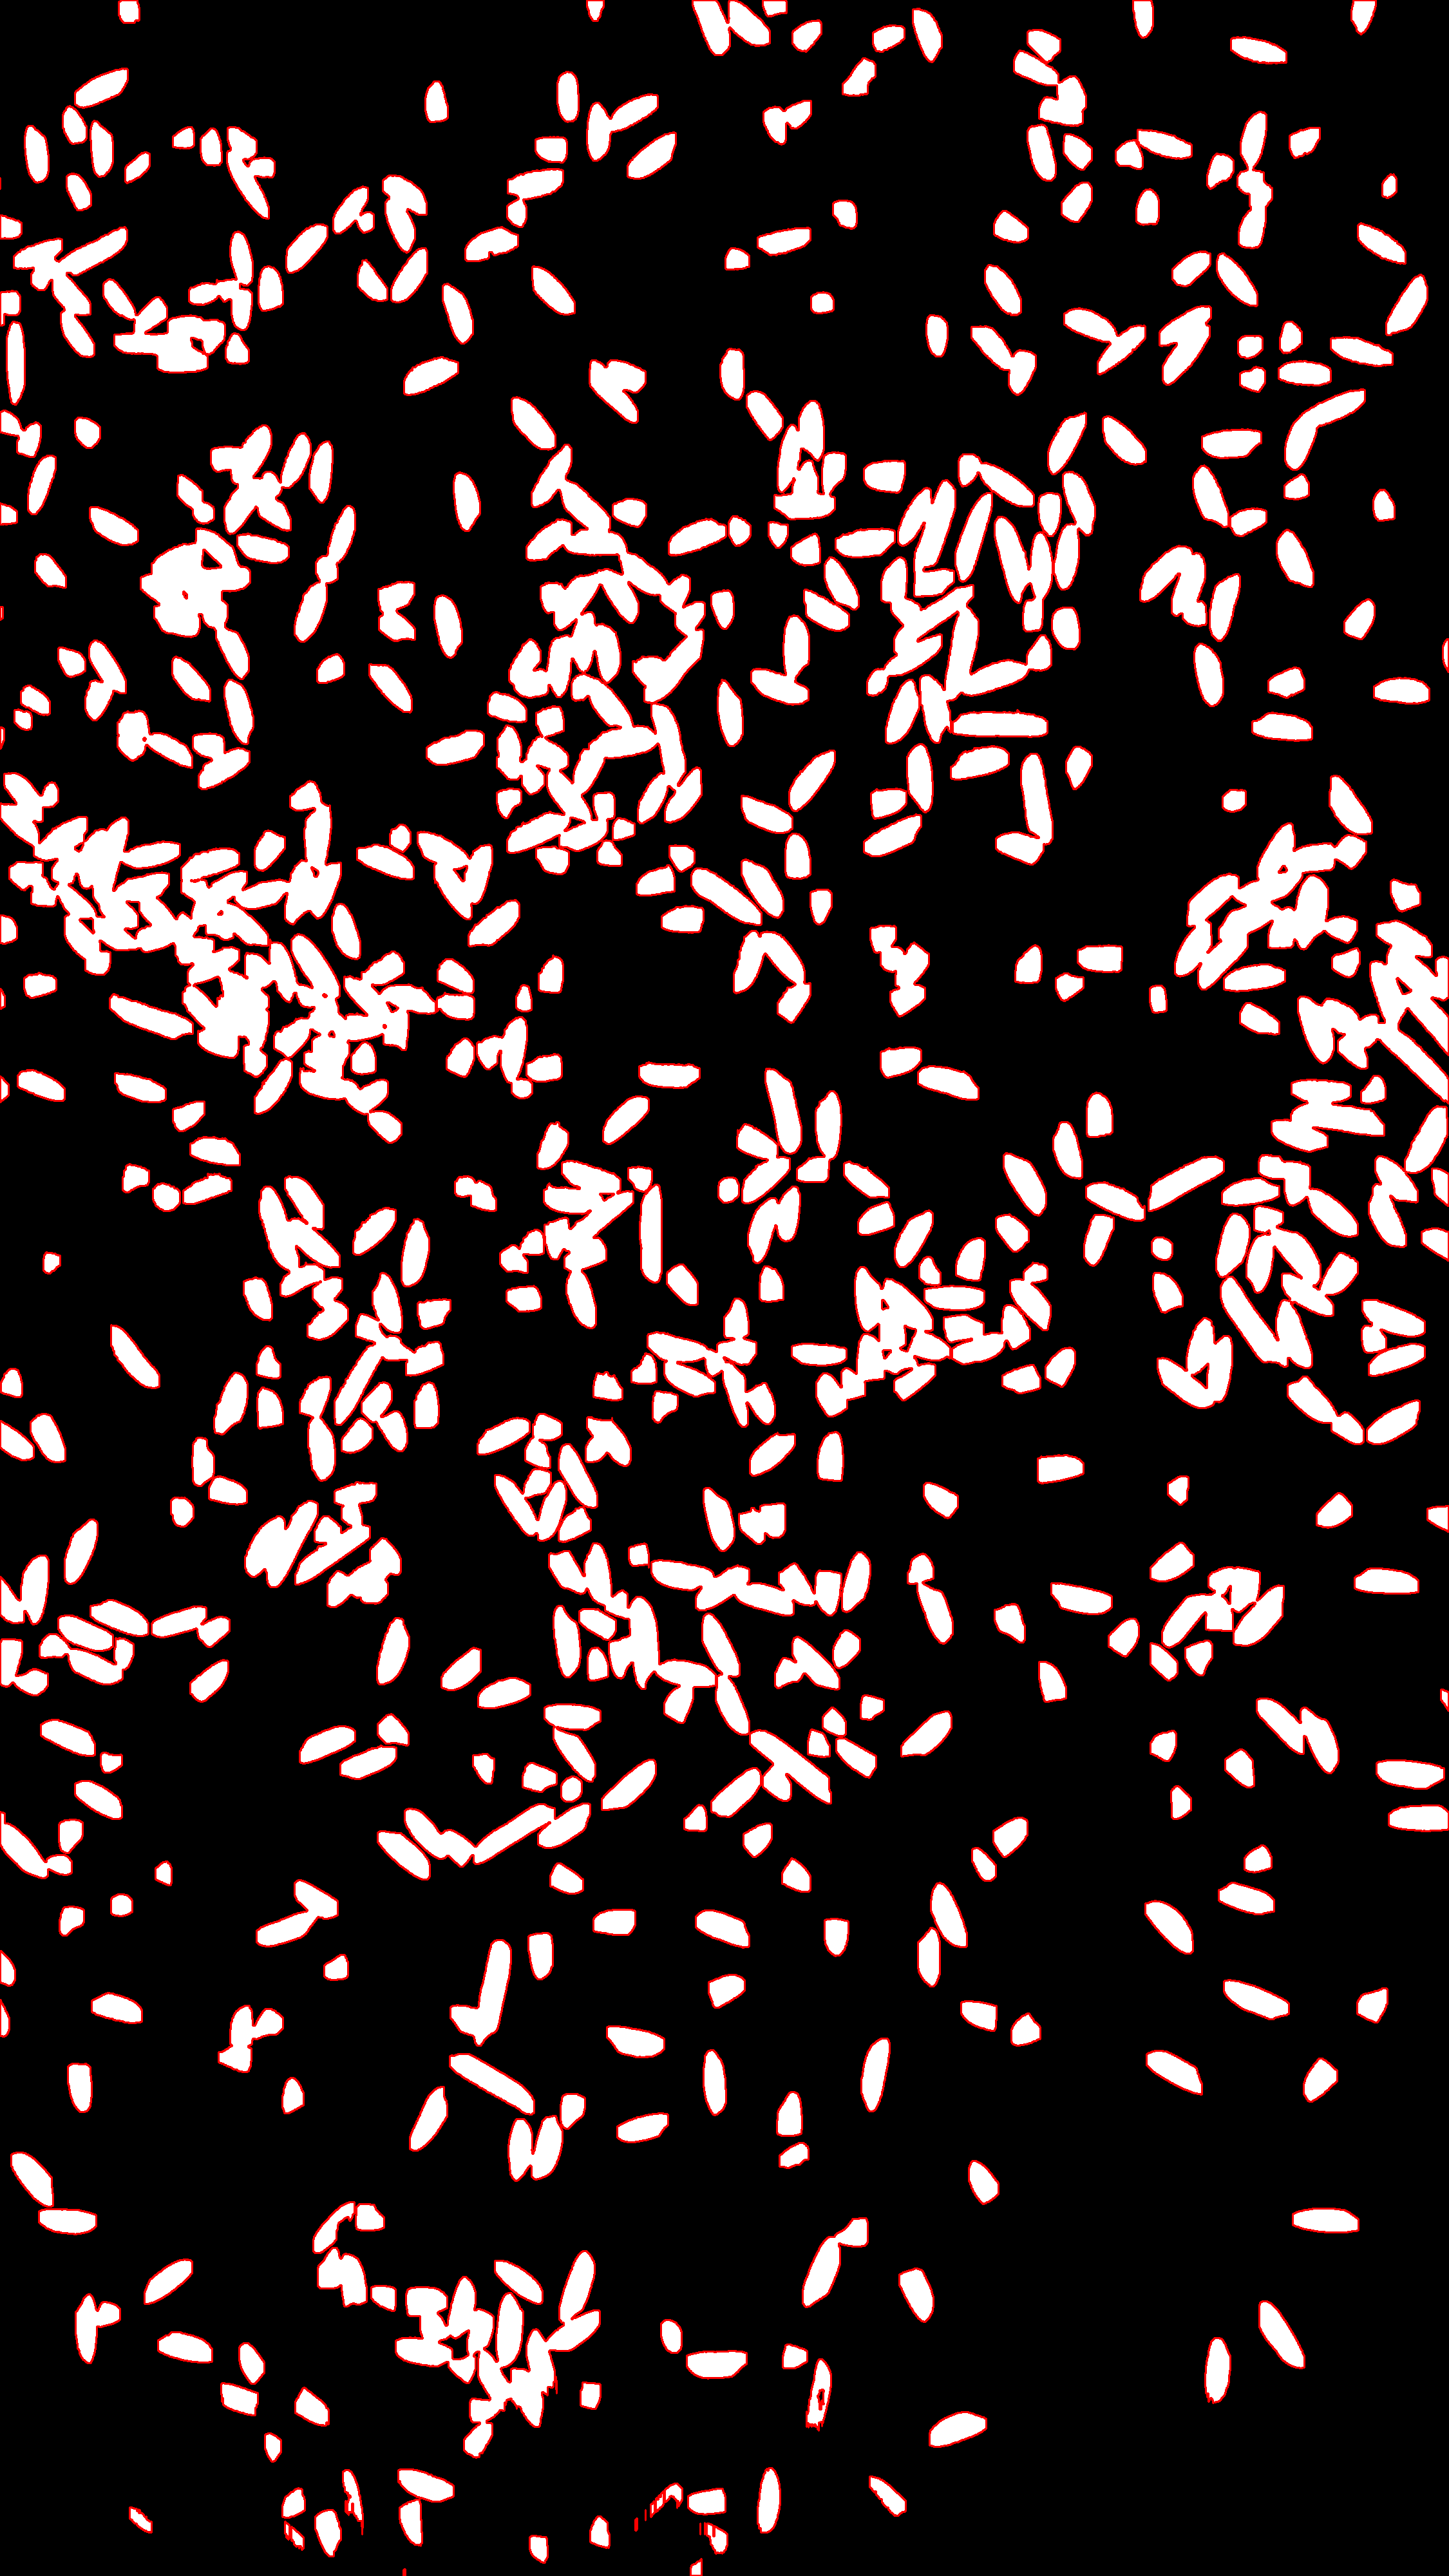

In [ ]:
print("Number of detected contours", len(contours))
cv2_imshow(output_contour)

Number of detected contours are 504, It denotes, total number of rice grain in the Image.

### **Applying Watershed Algorithm**
Fixing rice grains Touching problem with "WaterShed Algorithm"
Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. 

This algorithm generally helps in detecting touching and overlapping objects in image.

In [ ]:
#To visualize the segmentation conveniently, There needed a colour-code the labelled regions using the color, thus I did it.

#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans = ndimage.distance_transform_edt(clear_image)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max = feature.peak_local_max(dist_trans, min_distance=23)


local_max_mask = np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)] = True

#Aplying Watershed algorithm
labels = watershed(-dist_trans, measure.label(local_max_mask), mask=clear_image) # separate merged corns

**Counting Total Grains and Broken grains using grains area**

Number of Rice grains are : 704


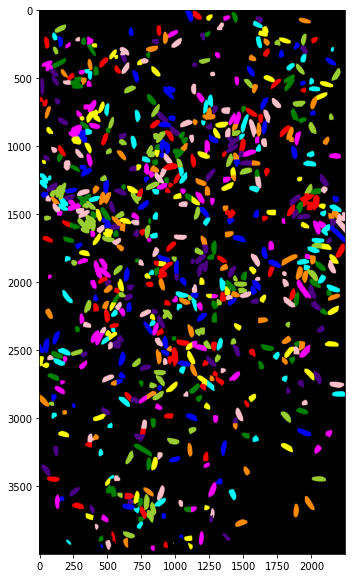

In [ ]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels, bg_label=0))
print("Number of Rice grains are : %d" % labels.max())

### **Results of WaterShed Algorithm**
The results are quite better after applying the Watershed algorithm. Most of the touching rice grains are well seperated now and counting is more accurate.

In the above results, there is the total counting of 504 and here, the count is of 704.

It means, there is total gap of 200 grains.

Well, the results are not 100% accurate but it is feasible in respect of Simple countous counting.

**Counting Broken Rice**

In [ ]:
#Creating A list name count for counting the total Broken rice grains
count = []

#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count.append(x)

#Output of the count list.

print("Total number of broken rice present in the Image is: ",len(count))

Total number of broken rice present in the Image is:  70


## **image5.jpg :**

Objective 1 : 

Count of the Total number of Rice grains = 704

Object 2 :

Count of the broken number of Rice grains = 70

## **CONCLUSION:**

Sharing submission.csv which consist count of the total number of rice grains and the broken rice grains.

Get submission.csv here:
https://drive.google.com/file/d/1mDjo5ZMqVi9R5NjdzwphOjJZPA76FTH-/view?usp=sharing

                                                   
                                                      
                                                      
                                                      THANKS FOR THE OPPORTUNITY